In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./Android-Apps/final.csv")

In [3]:
df.head()

,App,Package Name,Age-appropriate,Age
0,Gakondo,com.ishakwe.gakondo,Everyone,1
1,Ampere Battery Info,com.webserveis.batteryinfo,Everyone,1
2,Vibook,com.doantiepvien.crm,Everyone,1
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Everyone,1
4,GROW.me,com.horodyski.grower,Everyone,1


In [4]:
df["Maturity Level"] = np.random.randint(0, 3, df.shape[0])

In [5]:
df.head()

,App,Package Name,Age-appropriate,Age,Maturity Level
0,Gakondo,com.ishakwe.gakondo,Everyone,1,2
1,Ampere Battery Info,com.webserveis.batteryinfo,Everyone,1,1
2,Vibook,com.doantiepvien.crm,Everyone,1,2
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Everyone,1,0
4,GROW.me,com.horodyski.grower,Everyone,1,1


In [6]:
df["Maturity Level"].unique()

array([2, 1, 0])

In [7]:
df["Content Rating"] = df["Age"]
df.loc[df["Content Rating"] == 0, "Content Rating"] = 0
df.loc[df["Content Rating"] == 1, "Content Rating"] = 1
df.loc[df["Content Rating"] == 10, "Content Rating"] = 2
df.loc[df["Content Rating"] == 13, "Content Rating"] = 3
df.loc[df["Content Rating"] == 17, "Content Rating"] = 4
df.loc[df["Content Rating"] == 18, "Content Rating"] = 5

In [8]:
df2 = df.copy()

In [9]:
df2 = df2.drop(["App", "Package Name", "Maturity Level", "Age-appropriate"], axis=1)

In [10]:
df2.head()

,Age,Content Rating
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [11]:
print(df2["Content Rating"].unique())
print(df2["Age"].unique())

[1 3 4 2 5 0]
[ 1 13 17 10 18  0]


In [12]:
train_dataset = df2.sample(frac=0.8, random_state=0)
test_dataset = df2.drop(train_dataset.index)
train_dataset.head()

,Age,Content Rating
1080095,13,3
760724,1,1
284486,1,1
291688,1,1
586028,1,1


In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Content Rating')
test_labels = test_features.pop('Content Rating')

In [14]:
features = np.array(train_features)

normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(features)

In [23]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [24]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 34ms/step


array([[ 5.7155572e-02],
       [-5.1677227e-05],
       [-5.1677227e-05],
       [-5.1677227e-05],
       [-5.1677227e-05],
       [-5.1677227e-05],
       [-5.1677227e-05],
       [ 5.7155572e-02],
       [-5.1677227e-05],
       [-5.1677227e-05]], dtype=float32)

In [25]:
train_labels

1080095    3
760724     1
284486     1
291688     1
586028     1
          ..
940087     1
1962402    1
1876113    1
2057174    1
175156     1
Name: Content Rating, Length: 1803398, dtype: int64

In [26]:
linear_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [27]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=5,
    verbose=1,
    validation_split = 0.2)

Epoch 1/5
45085/45085 [==============================] - 26s 572us/step - loss: 0.0272 - val_loss: 0.0278
Epoch 2/5
45085/45085 [==============================] - 26s 582us/step - loss: 0.0272 - val_loss: 0.0395
Epoch 3/5
45085/45085 [==============================] - 25s 563us/step - loss: 0.0267 - val_loss: 0.0481
Epoch 4/5
45085/45085 [==============================] - 26s 577us/step - loss: 0.0263 - val_loss: 0.0139
Epoch 5/5
45085/45085 [==============================] - 26s 568us/step - loss: 0.0267 - val_loss: 0.0343
CPU times: user 2min 37s, sys: 19 s, total: 2min 56s
Wall time: 2min 9s


In [28]:
linear_model.evaluate(test_features, test_labels, verbose=1)

14090/14090 [==============================] - 6s 411us/step - loss: 0.0343


0.03431157022714615

In [29]:
preds = linear_model.predict(test_features)

for pred in preds[:10]:
    print(np.argmax(pred))

print()

for i in test_labels[:10]:
    print(i)

14090/14090 [==============================] - 5s 385us/step
0
0
0
0
0
0
0
0
0
0

1
1
1
1
1
3
1
1
1
1


In [168]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Age'], train_labels, label='Data')
  plt.scatter(x, y, color='k', label='Predictions')
  plt.xlabel('Age')
  plt.ylabel('Content Rating')
  plt.legend()

In [171]:
x = tf.linspace(0.0, 18, 450849)
preds.shape

(450849, 6)

ValueError: x and y must be the same size

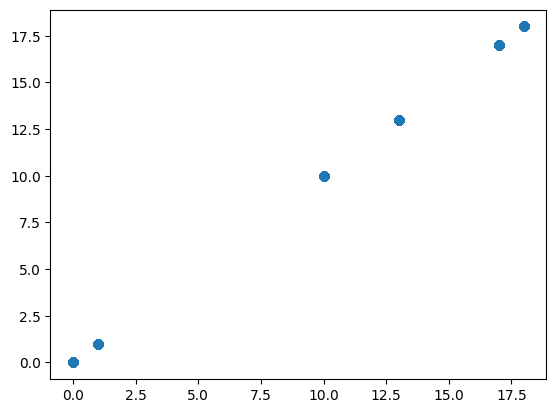

In [170]:
plot_horsepower(x, preds)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [100]:
y_data = df2.pop("Content Rating")
x_data = df2

In [101]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: Content Rating, dtype: int64

In [102]:
x_data.head()

,Age,Maturity Level
0,1,1
1,1,2
2,1,1
3,1,2
4,1,2


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0, test_size=0.25)

In [104]:
linear_regr = LinearRegression()

In [105]:
linear_regr.fit(x_train, y_train)

LinearRegression()

In [106]:
linear_regr.score(x_test, y_test)

0.8284371724207001